In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
pip install --upgrade pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
start='2010-01-01'
end='2024-06-30'

df = yf.download('AAPL', start=start, end=end)
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1) 
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


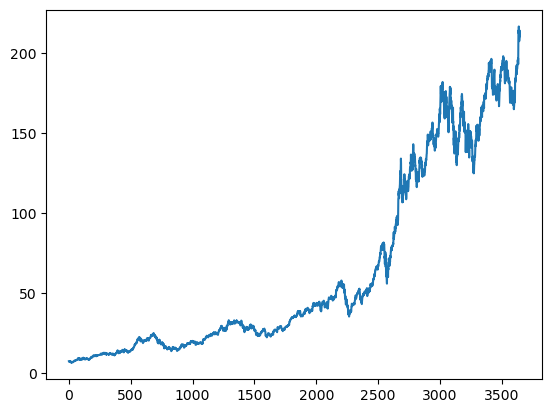

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3641,207.720001,212.699997,206.589996,208.139999,80727000
3642,209.149994,211.380005,208.610001,209.070007,56713900
3643,211.500000,214.860001,210.639999,213.250000,66213200
3644,214.690002,215.740005,212.350006,214.100006,49772700


In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3641    182.3539
3642    182.6006
3643    182.8645
3644    183.1470
3645    183.3764
Name: Close, Length: 3646, dtype: float64

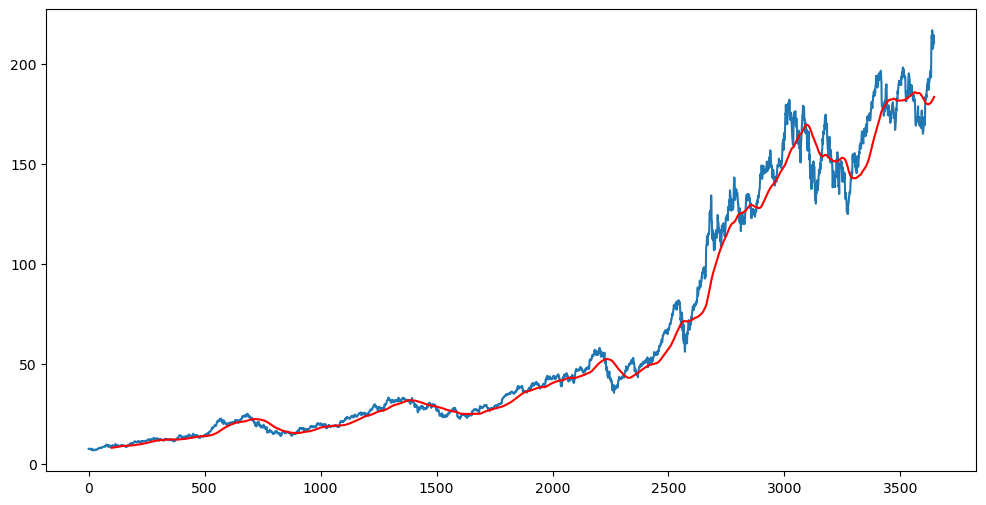

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3641    183.01765
3642    183.17520
3643    183.35055
3644    183.52425
3645    183.69585
Name: Close, Length: 3646, dtype: float64

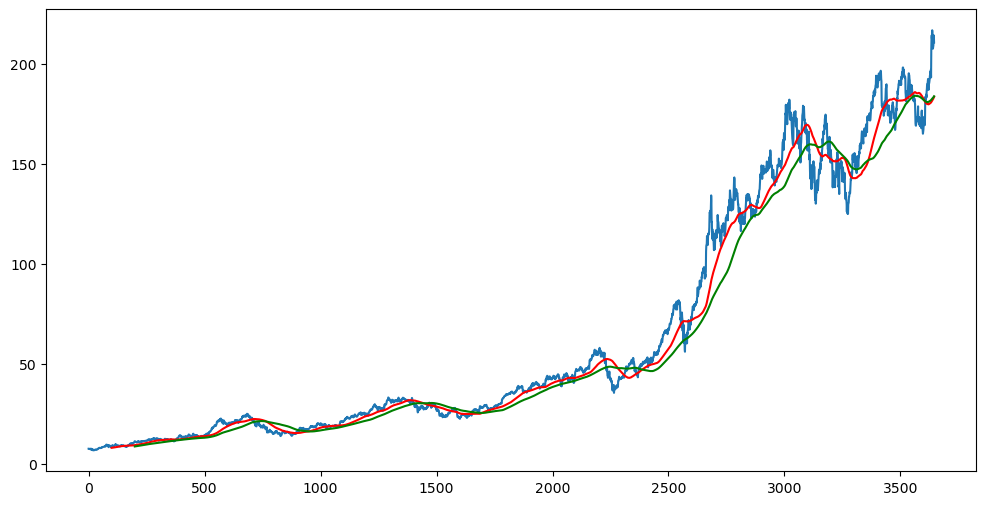

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(3646, 5)

In [14]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(2552, 1)
(1094, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
2552,72.019997
2553,73.162498
2554,68.379997
2555,68.339996
2556,74.702499


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.97698183],
       [0.95279616],
       [0.90319054]])

In [19]:
data_training_array.shape

(2552, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#ml model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu' , return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = 'relu'  ))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

C:\Users\xmrmo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - loss: 0.0391
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - loss: 0.0043
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - loss: 0.0050
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - loss: 0.0037
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - loss: 0.0031
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - loss: 0.0028
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - loss: 0.0026
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - loss: 0.0027
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - loss: 0.0027
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - loss: 0.0026
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - loss: 0.0029
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - loss: 0.0025
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 200ms/step - loss: 0.0021
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - loss: 0.0020
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# making Prediction 

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Predicted Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()